In [ ]:
import json
import os
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')

import shutil
shutil.unpack_archive("/content/gdrive/My Drive/Colab Notebooks/EmotionLines_friends_annotation (7).tar.gz", "/content/gdrive/My Drive/Colab Notebooks/EmotionLines_friends_annotation (7)")
with open('/content/gdrive/My Drive/Colab Notebooks/EmotionLines_friends_annotation (7)/EmotionLines/Friends/friends_dev.json') as dev_file:
      dev_data = json.load(dev_file)
with open('/content/gdrive/My Drive/Colab Notebooks/EmotionLines_friends_annotation (7)/EmotionLines/Friends/friends_train.json') as train_file:
      train_data = json.load(train_file)
with open('/content/gdrive/My Drive/Colab Notebooks/EmotionLines_friends_annotation (7)/EmotionLines/Friends/friends_test.json') as test_file:
      test_data = json.load(test_file)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import nltk
import random
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
nltk.download('punkt')


Using TensorFlow backend.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def annotation(data) :
    data_df_anno = []
    for k in range(0,len(data)):
      data_dfk = data[k]
      for i in range(0,len(data_dfk)) :
          data_df_anno.append(data_dfk[i]['annotation'])
    data_anno = []
    for i in data_df_anno :
      data_anno.append(list(i))
    return data_anno

In [ ]:
def data_df(data, a) :
    data_df = []
    for k in range(0,len(data)):
      data_dfk = data[k]
      for i in range(0,len(data_dfk)) :
          data_df.append(data_dfk[i][a])
    return data_df


In [ ]:
train_df_utter = data_df(train_data, 'utterance')
dev_df_utter = data_df(dev_data, 'utterance')
test_df_utter = data_df(test_data, 'utterance')

train_df_emotion = data_df(train_data, 'emotion')
dev_df_emotion = data_df(dev_data, 'emotion')
test_df_emotion = data_df(test_data, 'emotion')

train_df_annotation = annotation(train_data)
dev_df_annotation = annotation(dev_data)
test_df_annotation = annotation(test_data)



In [ ]:
y_train_anno = np.array(annotation(train_data))
y_dev_anno = np.array(annotation(dev_data))
y_test_anno = np.array(annotation(test_data))

In [ ]:
def counter(input_list):
    word_count = {}
    for word in input_list:
        if word in  word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1
    return word_count

In [ ]:
word_count = counter(test_df_emotion)
word_count

{'anger': 161,
 'disgust': 68,
 'fear': 32,
 'joy': 304,
 'neutral': 1287,
 'non-neutral': 541,
 'sadness': 85,
 'surprise': 286}

In [ ]:
import re
def data_pre(data) :
  max_seq_len = 0
  sentences = []
  for line in data:
        if line.strip() == 0:
          continue

        sentence = ' '.join(line.split(' ')[1:])
        tokenized_sentence = nltk.word_tokenize(sentence) #단어 단위 분리
        max_seq_len = max(max_seq_len, len(tokenized_sentence))

        sentences.append(sentence)
  
  letters_only = []
  for i in sentences :
    letter_only= re.sub('[^a-zA-Z]', ' ', i)

    letters_only.append(letter_only)

  lowers_case = []
  for i in letters_only :
      lower_case = i.lower()
      
      lowers_case.append(lower_case)
  return lowers_case

In [ ]:
lowers =data_pre(train_df_utter)
tokenizer = Tokenizer(num_words=5000, lower=True, char_level=False) #토크나이저 생성
tokenizer.fit_on_texts(lowers)

In [ ]:
TRAIN_SEQUENCES = tokenizer.texts_to_sequences(train_df_utter)
dev_sequences = tokenizer.texts_to_sequences(dev_df_utter)
test_sequences = tokenizer.texts_to_sequences(test_df_utter)

In [ ]:
TRAIN_SEQUENCES

In [ ]:
train_len = []
for i in range(0,len(train_data)) :
  train_len.append(len(TRAIN_SEQUENCES[i]))

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
MAX_SEQUENCE_LEN = max(train_len)
x_train = pad_sequences(TRAIN_SEQUENCES,padding = "post" , maxlen=MAX_SEQUENCE_LEN)
x_dev = pad_sequences(dev_sequences,padding = "post", maxlen=MAX_SEQUENCE_LEN)
x_test= pad_sequences(test_sequences,padding = "post", maxlen=MAX_SEQUENCE_LEN)

In [ ]:
x_train

In [ ]:
emotion = {'neutral':0, 'joy':1, 'sadness':2, 'fear':3, 'anger':4, 'surprise':5, 'disgust':6, 'non-neutral':7}

def one_hot_encoding(word, word2index):
       one_hot_vector = [0]*(len(word2index))
       index=word2index[word]
       one_hot_vector[index]=1
       return one_hot_vector

In [ ]:
y_train = []
for i in train_df_emotion:
  y_train.append(one_hot_encoding(i,emotion))
y_train

y_dev = []
for i in dev_df_emotion:
  y_dev.append(one_hot_encoding(i,emotion))
y_dev

y_test = []
for i in test_df_emotion:
  y_test.append(one_hot_encoding(i,emotion))
y_test

In [ ]:
y_train_arr = np.array(y_train)
y_dev_arr = np.array(y_dev)
y_test_arr = np.array(y_test)

In [ ]:
y_train_arr

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [ ]:
#Glove 다운로드
#출처: https://nlp.stanford.edu/projects/glove/
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip


--2020-06-29 04:57:40--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-06-29 04:57:40--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-06-29 04:57:40--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

EMBEDDING_DIM = 50 #100
embedding_matrix = create_embedding_matrix(
    './glove.6B.50d.txt',
    tokenizer.word_index, EMBEDDING_DIM
    )

In [ ]:
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras import Input, Model
vocab_size = 5214
max_len = max(train_len)
sequence_input = Input(shape=(max_len,), dtype='int32')
embedded_sequences = Embedding(vocab_size, 128, input_length=max_len)(sequence_input)


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 36)           0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 36, 50)       260700      input_4[0][0]                    
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 35, 100)      10100       embedding_2[0][0]                
__________________________________________________________________________________________________
conv1d_6 (Conv1D)               (None, 34, 100)      15100       embedding_2[0][0]                
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 10561 samples, validate on 1178 samples
Epoch 1/10
10561/10561 [==============================] - 6s 571us/step - loss: 1.0491 - accuracy: 0.6782 - val_loss: 1.0125 - val_accuracy: 0.6811
Epoch 2/10
10561/10561 [==============================] - 6s 537us/step - loss: 0.8848 - accuracy: 0.6793 - val_loss: 0.9390 - val_accuracy: 0.6824
Epoch 3/10
10561/10561 [==============================] - 6s 540us/step - loss: 0.7668 - accuracy: 0.6806 - val_loss: 0.9019 - val_accuracy: 0.6841
Epoch 4/10
10561/10561 [==============================] - 6s 541us/step - loss: 0.6301 - accuracy: 0.6816 - val_loss: 0.8657 - val_accuracy: 0.6842
Epoch 5/10
10561/10561 [==============================] - 6s 544us/step - loss: 0.4435 - accuracy: 0.6816 - val_loss: 0.8703 - val_accuracy: 0.6852
Epoch 6/10
10561/10561 [==============================] - 6s 538us/step - loss: 0.2448 - accuracy: 0.6817 - val_loss: 0.9113 - val_accuracy: 0.6858
Epoch 7/10
10561/10561 [==============================] - 6s 54

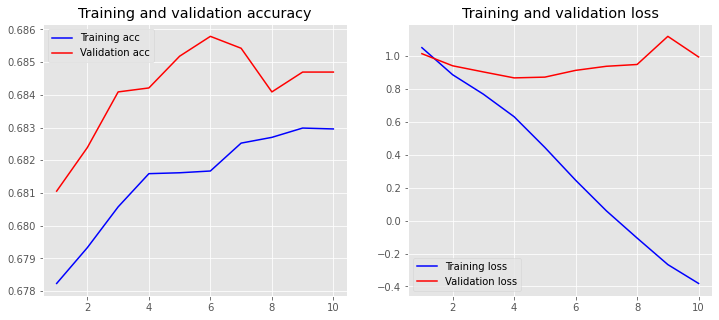

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.models import Model

seq_input = layers.Input(shape=(MAX_SEQUENCE_LEN,), dtype='int32')
vocab_size = 5214
seq_embedded = layers.Embedding(vocab_size, 
                           EMBEDDING_DIM, 
                           weights=[embedding_matrix], 
                           input_length=MAX_SEQUENCE_LEN, 
                           trainable=True)(seq_input)

filters = [2,3,4,5]
conv_models = []
for filter in filters:
  conv_feat = layers.Conv1D(filters=100, 
                            kernel_size=filter, 
                            activation='relu',
                            padding='valid')(seq_embedded) #Convolution Layer
  pooled_feat = layers.GlobalMaxPooling1D()(conv_feat) #MaxPooling
  conv_models.append(pooled_feat)

conv_merged = layers.concatenate(conv_models, axis=1) #filter size가 2,3,4,5인 결과들 Concatenation

model_output = layers.Dropout(0.2)(conv_merged)
model_output = layers.Dense(10, activation='relu')(model_output)
logits = layers.Dense(7, activation='softmax')(model_output)

model = Model(seq_input, logits) #(입력,출력)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

#학습 시작
history = model.fit(x_train, y_train_anno,
                    epochs=10,
                    verbose=True,
                    validation_data=(x_dev, y_dev_anno),
                    batch_size=128)
# 결과 시각화
plot_history(history)

In [ ]:
y_anno_pred= model.predict(x_test)
y_anno_pred[59]

array([0.8820711 , 0.01678245, 0.03519383, 0.01210078, 0.02380187,
       0.01617691, 0.01387315], dtype=float32)

In [ ]:
y_test[59]

[1, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
max(y_anno_pred[59])

0.6635466

In [ ]:
y_pred2 = []
for i in range(0,len(y_anno_pred)):
 if max(y_anno_pred[i]) >= 0.3 :
    for k in range(0,len(y_anno_pred[0])) :
      if y_anno_pred[i][k] == max(y_anno_pred[i]) :
         one_hot_vector = [0]*8
         one_hot_vector[k]=1
         y_pred2.append(one_hot_vector)
 else :
    one_hot_vector = [0]*8
    one_hot_vector[7] = 1
    y_pred2.append(one_hot_vector)

        

In [ ]:
y_test

In [ ]:
y_pred2

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_pred2,y_test,average='micro')

0.48878437047756873

In [ ]:
y_pred_num = []
for l in y_tran_pred :
 count = 0
 for k in l :
   if k != max(l) :
     count += 1
   else :
     y_pred_num.append(count)

one_hot_vector = []
y_pred3 = []
for i in y_pred_num :
  one_hot_vector = [0]*8
  one_hot_vector[i]=1
  y_pred3.append(one_hot_vector)